# MSDS 430 - Milestone 2  
# Rakshit (Rocky) Bhatt, Kurtis Boll, Parker Davis
# 5-31-20

## 1) Reading in the dataset

In [1]:
import pandas as pd
from IPython.display import display


df1 = pd.read_csv("http://www.sharecsv.com/dl/52b9b737380b73b6c02b1d8475fce941/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv")
pd.options.display.max_columns = None
display(df1)
df1.describe()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.


,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4949.000000,4738.000000,4741.000000,4959.000000,4725.000000,4726.000000,4926.000000
mean,31.088301,26.898691,4.479646,22.338173,19.017566,3.579348,1.728177
std,45.438282,44.010591,3.489021,35.026176,34.114849,3.170223,55.708966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [2]:
df1.dtypes

Date                      object
Time                      object
Location                  object
Operator                  object
Flight #                  object
Route                     object
AC Type                   object
Registration              object
cn/ln                     object
Aboard                   float64
Aboard Passangers        float64
Aboard Crew              float64
Fatalities               float64
Fatalities Passangers    float64
Fatalities Crew          float64
Ground                   float64
Summary                   object
dtype: object

In [3]:
#Identify the rows with NULL values using df[df['A'].isnull()].index.tolist()
DateRows = df1[df1['Date'].isnull()].index.tolist()
LocationRows = df1[df1['Location'].isnull()].index.tolist()
OperatorRows = df1[df1['Operator'].isnull()].index.tolist()
AC_TypeRows = df1[df1['AC Type'].isnull()].index.tolist()
AboardRows = df1[df1['Aboard'].isnull()].index.tolist()
FatalitiesRows = df1[df1['Fatalities'].isnull()].index.tolist()

In [4]:
#Concatenate the rows for deletion
DeleteRows=[*DateRows, *LocationRows, *OperatorRows, *AC_TypeRows, *AboardRows, *FatalitiesRows] 

#Number of rows deleted
len(DeleteRows)

55

In [5]:
#drop rows in DeleteRows list and keep the same index
df2=df1.drop(DeleteRows)
display(df2)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.


In [6]:
Bot = df2.quantile(0.10) #10th percentile stats
Top = df2.quantile(0.90) #90th percentile stats
print(Bot)
print(Top)

Aboard                   3.0
Aboard Passangers        0.0
Aboard Crew              1.0
Fatalities               2.0
Fatalities Passangers    0.0
Fatalities Crew          1.0
Ground                   0.0
Name: 0.1, dtype: float64
Aboard                   77.0
Aboard Passangers        72.0
Aboard Crew               8.0
Fatalities               52.0
Fatalities Passangers    49.0
Fatalities Crew           7.0
Ground                    0.0
Name: 0.9, dtype: float64


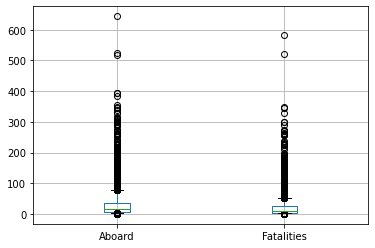

In [7]:
#Display boxplot showing the outliers with circles below the 10th percentile and above the 90th percentile.
df2.boxplot(["Aboard","Fatalities"],whis=[10,90])

## 2) Why did you pick this data?

With two of our group members working for Boeing, we decided we wanted to do an aviation related project. After researching datasets on Kaggle, the airplane crash data since 1908 dataset really caught our interest as it was comprehensive and contained multiple categories of data that we could use.

## 3) Explain what you hope to learn from this data

We are hoping to find out and learn which family of aircraft, manufacturer, airline, and location had the most crashes since 1908 by analyzing the dataset and isolating those categories. 

## 4) Do you have a hunch about what this data will reveal?

Our initial hunch about this data is that there will be more crashes earlier on in the years following 1908 and improving up to 2019 as aviation safety has generally improved historically over time. Additionally, we believe that there will be a correlation with crashes in areas that have more obstacles surrounding the runway strip and are known for treacherous weather conditions. 

## 5) What is the population being represented by the data you’ve chosen? What is the total sample size?

The population within the data consists of airplane crash data since 1908 taken from an aviation accident database and limited to accidents with the following constraints: 

- All civil and commercial aviation accidents of scheduled and non-scheduled passenger airliners worldwide, which resulted in a fatality (including all U.S. Part 121 and Part 135 fatal accidents)

- All cargo, positioning, ferry and test flight fatal accidents.

- All military transport accidents with 10 or more fatalities.

- All commercial and military helicopter accidents with greater than 10 fatalities.

- All civil and military airship accidents involving fatalities.

- Aviation accidents involving the death of famous people.

- Aviation accidents or incidents of noteworthy interest.


The total sample size of the data consists of 17 columns with 4101 unique values. 

## 6) How was the data collected?

The data was collected from planecrashinfo.com. This website has a database that has recorded almost every plane accident since 1908. No random sampling or sampling weights are used. The original inspiration for the formation of this dataset was to see which airline operator was the worst. The data can be cleaned to only view major worldwide airlines if necessary. Contains data on 4968 crashes. 


## 7) Inspect the data

-	The date column is in m/d/yyyy format 
-	All civil and commercial accidents worldwide containing both scheduled and non-scheduled flights
-	Contains military transport accidents with 10 or more fatalities 
-	There are 4968 rows and 17 columns. Nulls exist in many of the columns 
-	Some columns have the word “null” written and others have blank cells
-	Time is written in 24-hour format (Ex: 17:00)

## 8) Data dictionary

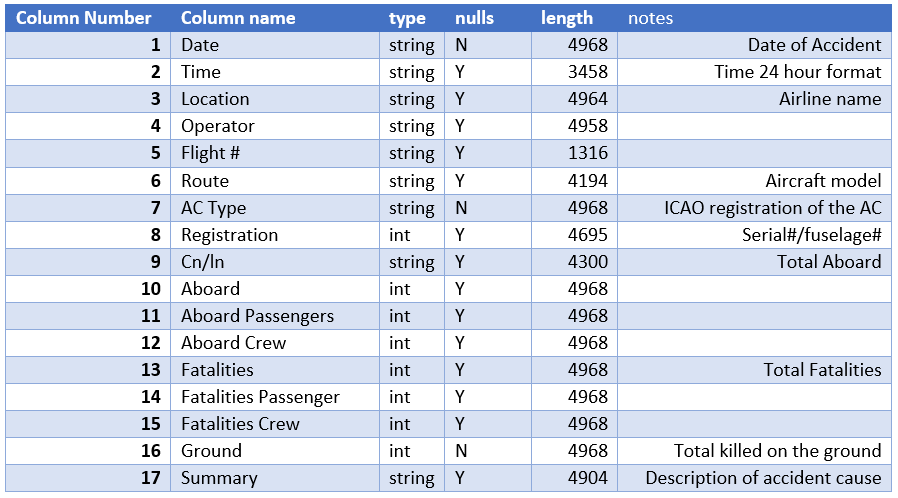

In [8]:
from IPython.display import Image
Image("https://i.ibb.co/1RFKky4/dictionary-v2.png")

## 9) Data Quality

Looking at the quality of the data, we targeted four key quality indicators, completeness, consistency, integrity and accuracy. To measure completeness, we looked at six columns of interest: Date, Location, Operator, AC Type, Aboard, and Fatalities, to confirm values were present for each line record in the dataset. We determined that rows with “null” or absent values would be omitted from the dataset. We did this for all six categories. We eliminated a total of 55 rows. 

Boxplots and percentiles were used to measure data consistency and identify outliers. Data points in the 10th percentiles signified smaller aircraft flights carrying less than four passengers. Data points in the 90th percentiles signified aircraft flights carrying more than 77 passengers. These outliers were identified, quantified and shown with a boxplot.  The outliers lie outside the “whiskers” of the plot. These items were not immediately eliminated. We many parse the data into subsets for smaller private and larger commercial flights.

For Integrity, each data entry was scrubbed to determine the correct data type was present for the focus columns mentioned above. This was performed by comparing the data type to an expected value and returning a True or False.

For Accuracy we had to trust the origin of the dataset. The dataset referenced numerous sources including many notables such as the National Transportation Safety Board.
http://www.planecrashinfo.com/reference.htm

# ----------------------------------- START MILESTONE 2 --------------------------------------------

### HERE IS FOR THE INTRO

In [11]:
import matplotlib.pyplot as plt


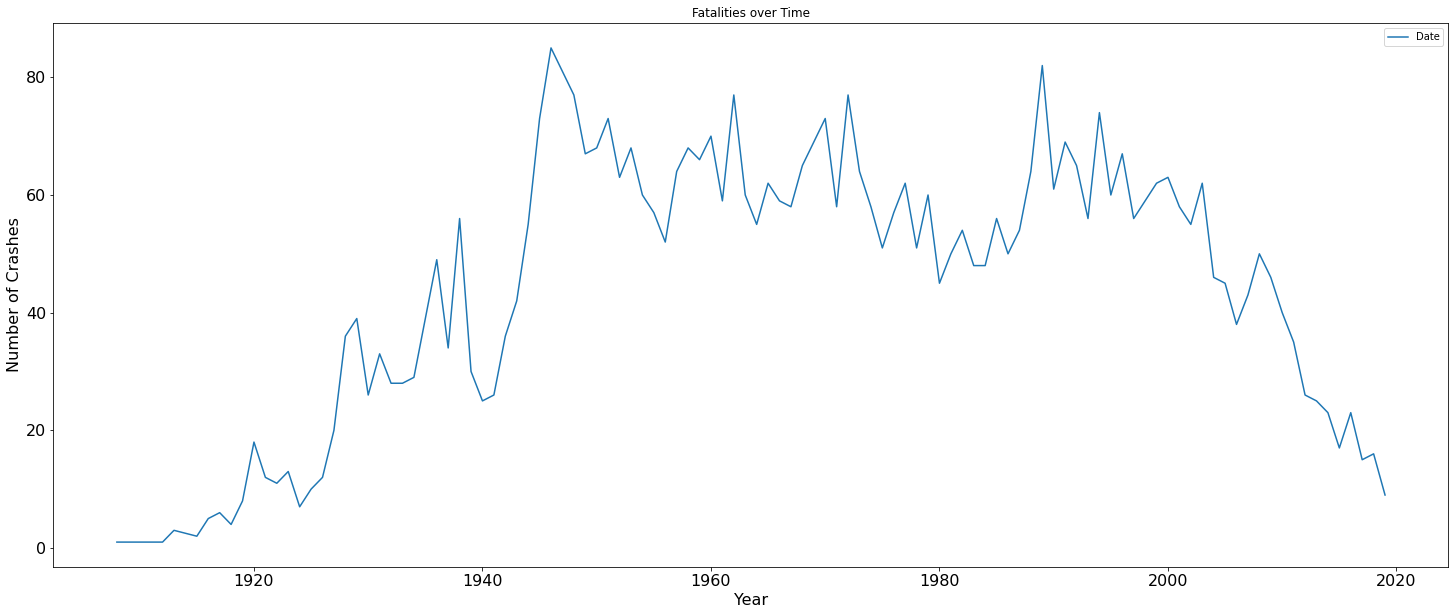

In [12]:
bx = df2['Date']
cx = pd.to_datetime(bx)

yearcrash = cx.groupby([cx.dt.year]).count().plot(kind='line', title ="Fatalities over Time", figsize=(25, 10), legend=True, fontsize=16)
yearcrash.set_xlabel("Year", fontsize=16)
yearcrash.set_ylabel("Number of Crashes", fontsize=16)
plt.show()

The following plot demonstrates the number of plane crashes per year from 1908 - 2019. The plot shows a few spikes in crashes around 1945. The crashes per year remained closely constant until after 2000. After 2000 crashes dropped significantly which is an extreme sign of safety, because the number of flights per year has grown between 3-9% per year.
The timeline below indicates in the late 1990's the main safety 

Aviation Safety Timeline 
-	9/17/1908 Aviation safety began after the first aviation fatality 
-	1926 Bureau of Air Commerce was formed to manage the rapidly growing field and make it safe
-	1931 first high profile person died in a crash causing two majors changes
    -	Changed the practice of keeping the cause of the accident a secret
    -	Started a trend for using tech and design to improve safety 
    -	Switched from wood and fabric to aluminum 
-	1935 another high-profile person was killed 
-	1938 Civil Aeronautics agency formed due to the incident in 1935
    -	They separated air travel from the department of commerce so that the department of commerce could mainly focus on         and investigate safety issues
-	1956 mid air crash due to lack of radar
    -	Regulators were reorganized into the FAA 
    -	This also led to flight recorder and voice recorder devices being implemented to help investigators find reasons           or the crashes
-	1967 voice and flight recorders are officially mandated 
    -	This revolutionized finding causes for crashes and prevention techniques
    -	Showed that most crashes were due to human error
    -	Led to better pilot and crew training 
-	Mid 1990’s Crew Resource management (CRM) was widely mature and prevented many crashes 
-	Late 1990’s the Flight Operations Quality Assurance (FOQA) was developed as a system to predict future trends or problems that CRM could not
    -	Allowed investigators to monitor data from successful flights to predict problems before they occurred
-	Now we have Safety Management System which is essentially the evolved version of FOQA

https://www.statista.com/statistics/193533/growth-of-global-air-traffic-passenger-demand/
https://www.aerocrewnews.com/aviation-news/safety-matters/the-evolution-of-aviation-safety/




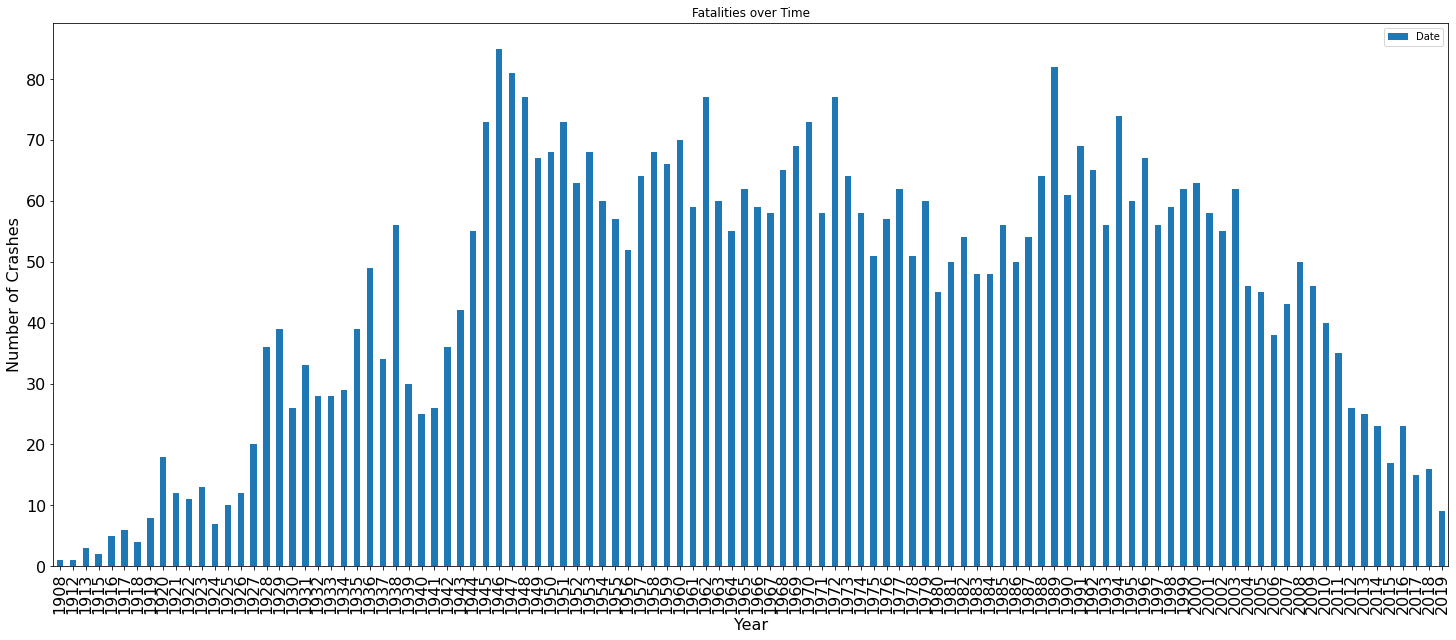

In [13]:
bx = df2['Date']
cx = pd.to_datetime(bx)

yearcrash = cx.groupby([cx.dt.year]).count().plot(kind='bar', title ="Fatalities over Time", figsize=(25, 10), legend=True, fontsize=16)
yearcrash.set_xlabel("Year", fontsize=16)
yearcrash.set_ylabel("Number of Crashes", fontsize=16)
plt.show()

The bar graph was used to easily visualize peaks in the number of cases over time. From the bar graph we can see that the number of cases after 2000 drastically drops off. This indicates that aviation safety post the 19th century has greatly improved. This decline in the number of fatalities could be attributed to a multitude of factors, ranging from advancements in technology and pilot training to a renewed focus on aviation safety post 9/11.

The following are a few aviation safety related changes and improvements that have occurred since 2000: 

- Improvements in fly-by-wire technology since they were invented in the 1980s
- Strides in safety management systems reducing human error 
- Advances in cockpit data monitoring and flight control software



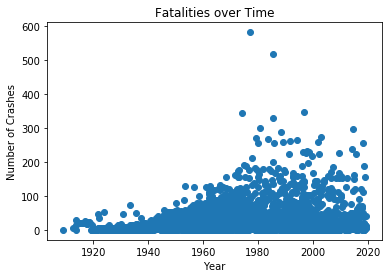

In [29]:
import matplotlib.pyplot as plt

bx = df2['Date']
cx = pd.to_datetime(bx)
y = df2['Fatalities']

plt.scatter(cx, y)


plt.xlabel('Year')
plt.ylabel('Number of Crashes')

plt.title('Fatalities over Time')

plt.show()

This scatterplot was used to visualize the presence of outliers, or in this case, peaks in the number of fatalities over the years. The time period immediately prior to and after 1980 contained a peak of flight crashes. 

The peak before 1980 can be attributed to the Tenerife Airport Disaster in 1977 where due to miscommunication between air traffic controllers, a KLM Boeing 747 took off without flight clearance and collided with a taxiing Pan Am 747 causing 583 casualties, making it the single deadliest aircraft crash in history in terms of the highest number of airliner passenger fatalities. 

### Conclusion